#Possum Regression:
determine age by body lengths
Data from Kaggle at: https://www.kaggle.com/datasets/abrambeyer/openintro-possum

In [1]:
#upload de arquivo do computador
from google.colab import files
import pandas as pd
import numpy as np
uploaded = files.upload()

Saving possum.csv to possum.csv


In [2]:
#Baixando data
url = '/content/possum.csv'
Df = pd.read_csv(url)

In [3]:
Df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
#let´s drop any Nan rows
Df = Df.dropna(axis=0)

In [5]:
#selecting only body lengths, cleaning unused columns
col = ['case','site','Pop','sex','age']
body_len = Df.drop(columns = col)
body_len.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [7]:
body_len['skullw'].head()

0    60.4
1    57.6
2    60.0
3    57.1
4    56.3
Name: skullw, dtype: float64

In [8]:
body_len.shape

(101, 9)

In [10]:
#let´s do the same with age only
age = Df['age']
age.head()

0    8.0
1    6.0
2    6.0
3    6.0
4    2.0
Name: age, dtype: float64

In [11]:
age.shape

(101,)

Now our data is clean, let´s make a machine learning regression model

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
body_len.values[:10]

array([[94.1, 60.4, 89. , 36. , 74.5, 54.5, 15.2, 28. , 36. ],
       [92.5, 57.6, 91.5, 36.5, 72.5, 51.2, 16. , 28.5, 33. ],
       [94. , 60. , 95.5, 39. , 75.4, 51.9, 15.5, 30. , 34. ],
       [93.2, 57.1, 92. , 38. , 76.1, 52.2, 15.2, 28. , 34. ],
       [91.5, 56.3, 85.5, 36. , 71. , 53.2, 15.1, 28.5, 33. ],
       [93.1, 54.8, 90.5, 35.5, 73.2, 53.6, 14.2, 30. , 32. ],
       [95.3, 58.2, 89.5, 36. , 71.5, 52. , 14.2, 30. , 34.5],
       [94.8, 57.6, 91. , 37. , 72.7, 53.9, 14.5, 29. , 34. ],
       [93.4, 56.3, 91.5, 37. , 72.4, 52.9, 15.5, 28. , 33. ],
       [91.8, 58. , 89.5, 37.5, 70.9, 53.4, 14.4, 27.5, 32. ]])

In [15]:
body_len_arr = np.array(body_len.values)
age_arr = np.array(age.values)
print(body_len_arr.shape)
print(age_arr.shape)

(101, 9)
(101,)


In [16]:
age_arr[:10]

array([8., 6., 6., 6., 2., 1., 2., 6., 9., 6.])

In [18]:
#let´s splitting data: train, validation and test
#train:65,validation:16,test: 20
#train
x_train = body_len_arr[:65]
y_train = age_arr[:65]
x_val = body_len_arr[65:(65+16)]
y_val = age_arr[65:(65+16)]
x_test = body_len_arr[(65+16):]
y_test = age_arr[(65+16):]
s = lambda s: s.shape
print(s(x_train),s(y_train),s(x_val),s(y_val),s(x_test),s(y_test))

(65, 9) (65,) (16, 9) (16,) (20, 9) (20,)


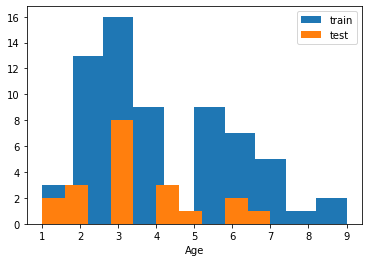

In [19]:
plt.hist(y_train, label='train')
plt.hist(y_test, label = 'test')
plt.xlabel('Age')
plt.legend();

In [21]:
x_train[:10]

array([[94.1, 60.4, 89. , 36. , 74.5, 54.5, 15.2, 28. , 36. ],
       [92.5, 57.6, 91.5, 36.5, 72.5, 51.2, 16. , 28.5, 33. ],
       [94. , 60. , 95.5, 39. , 75.4, 51.9, 15.5, 30. , 34. ],
       [93.2, 57.1, 92. , 38. , 76.1, 52.2, 15.2, 28. , 34. ],
       [91.5, 56.3, 85.5, 36. , 71. , 53.2, 15.1, 28.5, 33. ],
       [93.1, 54.8, 90.5, 35.5, 73.2, 53.6, 14.2, 30. , 32. ],
       [95.3, 58.2, 89.5, 36. , 71.5, 52. , 14.2, 30. , 34.5],
       [94.8, 57.6, 91. , 37. , 72.7, 53.9, 14.5, 29. , 34. ],
       [93.4, 56.3, 91.5, 37. , 72.4, 52.9, 15.5, 28. , 33. ],
       [91.8, 58. , 89.5, 37.5, 70.9, 53.4, 14.4, 27.5, 32. ]])

In [22]:
#Normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_train)

# then we call the transform method to scale both the training and testing data
x_train_norm = scaler.transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)

In [23]:
x_train_norm[0]

array([ 0.14822412,  1.00163272,  0.14675903, -0.35057547,  1.04515351,
        1.18324043,  0.01393894,  0.1426307 ,  1.0279182 ])

In [24]:
y_train[0]

8.0

In [25]:
x_train.shape

(65, 9)

In [ ]:
#input shape has 9 features
input_shape = 9
neurons = 80
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(neurons, activation='relu'),
    tf.keras.layers.Dense(neurons, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

model.summary()

In [102]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate =0.0005)
model.compile(
    optimizer = opt,
    loss ='mse',
    metrics =['mae']
    )

In [104]:
#Let´s add a callback to prevent overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [105]:
history = model.fit(
    x_train_norm, 
    y_train,
    epochs=1000, 
    validation_data =(x_val_norm,y_val),
    callbacks = [callback]
    )

Epoch 1/1000
3/3 [==============================] - 1s 76ms/step - loss: 21.1863 - mae: 4.1860 - val_loss: 17.4192 - val_mae: 3.6372
Epoch 2/1000
3/3 [==============================] - 0s 14ms/step - loss: 20.2482 - mae: 4.0667 - val_loss: 16.4651 - val_mae: 3.4744
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 19.4586 - mae: 3.9602 - val_loss: 15.6192 - val_mae: 3.3205
Epoch 4/1000
3/3 [==============================] - 0s 11ms/step - loss: 18.6852 - mae: 3.8569 - val_loss: 14.8629 - val_mae: 3.1725
Epoch 5/1000
3/3 [==============================] - 0s 12ms/step - loss: 17.9932 - mae: 3.7596 - val_loss: 14.1642 - val_mae: 3.0289
Epoch 6/1000
3/3 [==============================] - 0s 12ms/step - loss: 17.3061 - mae: 3.6597 - val_loss: 13.5274 - val_mae: 2.9262
Epoch 7/1000
3/3 [==============================] - 0s 23ms/step - loss: 16.6500 - mae: 3.5644 - val_loss: 12.9445 - val_mae: 2.8716
Epoch 8/1000
3/3 [==============================] - 0s 14ms/step - lo

In [106]:
train_eval = model.evaluate(x_train_norm, y_train)
val_eval = model.evaluate(x_val_norm, y_val)
test_eval = model.evaluate(x_test_norm, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 2.8368 - mae: 1.3325


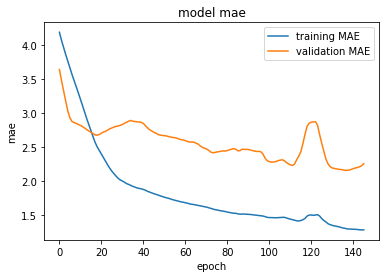

In [107]:
plt.plot(history.history['mae'], label='training MAE')
plt.plot(history.history['val_mae'], label='validation MAE')
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

In [109]:
y_hat = model.predict(x_test_norm)
print(y_hat[:5]) # get the output predict values for the 5 first samples

1/1 [==============================] - 0s 86ms/step
[[4.594117 ]
 [4.4707375]
 [3.7091923]
 [4.0601034]
 [2.9473302]]


In [110]:
y_test[:5]

array([3., 3., 2., 2., 6.])

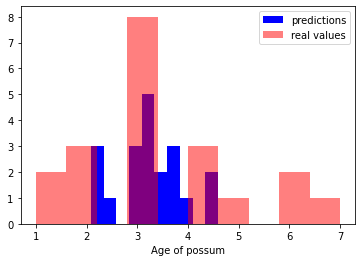

In [112]:
plt.hist(y_hat, label='predictions', color = 'b')
plt.hist(y_test, label = 'real values', color = 'r', alpha=0.5)
plt.xlabel('Age of possum')
plt.legend();
#You can see some purple overlaps!

Since *MAE* is a error metric more resilient to outliers than *RMSE*, we can say that the model prediction error is about +/- 1.33 years old.